In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = np.loadtxt('./data.txt')
X, y = data[:, :1], data[:, -1] 

In [3]:
X.shape, y.shape

((320, 1), (320,))

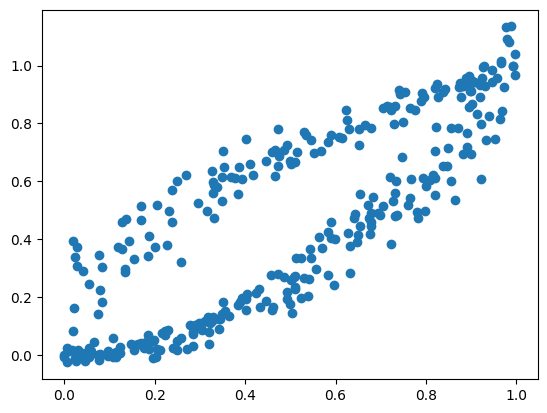

In [4]:
plt.scatter(X[:, 0], y)

\begin{eqnarray}
  \mathcal{L}(w) &=& \sum_i (w \cdot x_i - y_i) ^ 2 + \lambda \|w\|^2 =\\
    && \|X w - y\|^2 + \lambda \|w\|^2\to \min;\\
  \frac{\partial}{\partial w}\mathcal{L}(w) &=& 2 X^T (X w - y) + 2 \lambda w= 0;\\
  w &=& (X^T X + \lambda I)^{-1} X^T y.
\end{eqnarray}

In [5]:
def linear(X, y, alpha=0.1):
    C = np.matmul(X.T, X)

    C_reg_inv = np.linalg.inv(C +  alpha * np.eye(1))
    w = np.matmul(np.matmul(C_reg_inv, X.T), y)
    
    return w

In [6]:
w = linear(X, y, alpha=1.0e-6)
predictions = np.matmul(X, w)

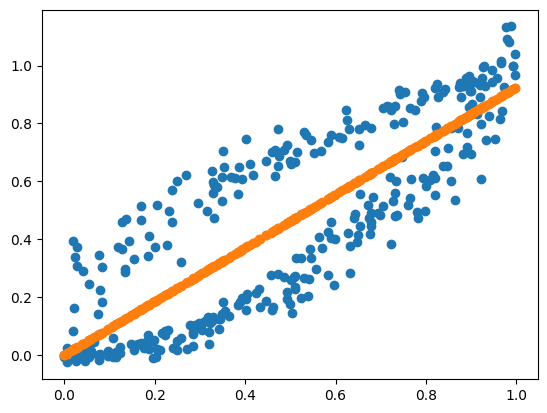

In [7]:
plt.scatter(X[:, 0], y)
plt.scatter(X[:, 0], predictions)

In [192]:
def basis(X):
    n, _ = X.shape
    ones = np.ones(shape=(n, 1))
    square = np.square(X)
    log1p = np.log1p(X)
    return np.concatenate([ones, square, log1p], axis=1)

In [193]:
Phi = basis(X) 

In [194]:
w = linear(Phi, y, alpha=1.0e-6)
w

array([0.07268824, 0.53319857, 0.55265884])

In [195]:
predictions = np.matmul(Phi, w)

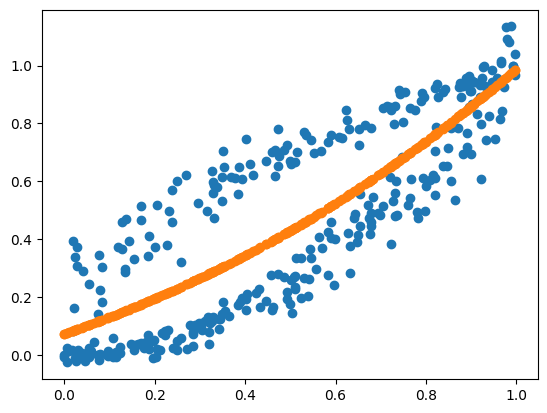

In [196]:
plt.scatter(X[:, 0], y)
plt.scatter(X[:, 0], predictions)

In [197]:
errors = predictions - y

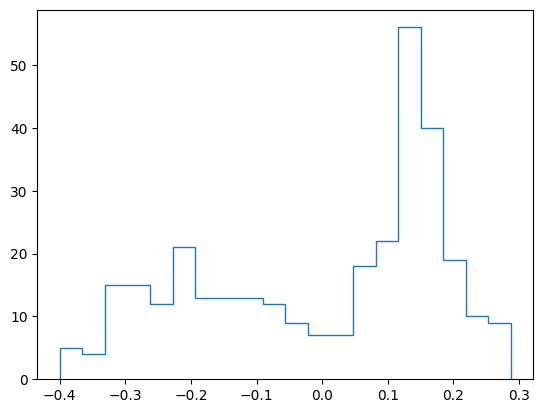

In [198]:
_ = plt.hist(errors, bins=20, histtype='step')

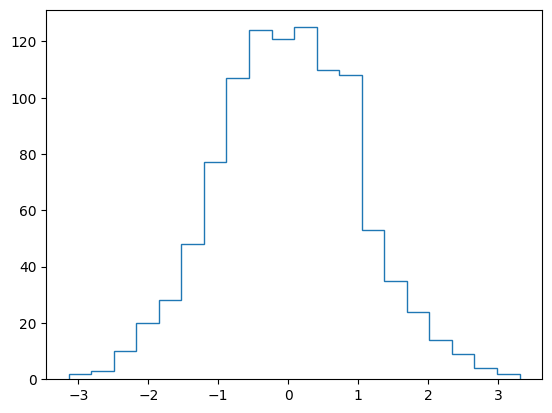

In [199]:
_ = plt.hist(np.random.normal(size=(1024, )), bins=20, histtype='step')

In [200]:
indx = X[:, 0] > y
X_lower = X[indx]
y_lower = y[indx]

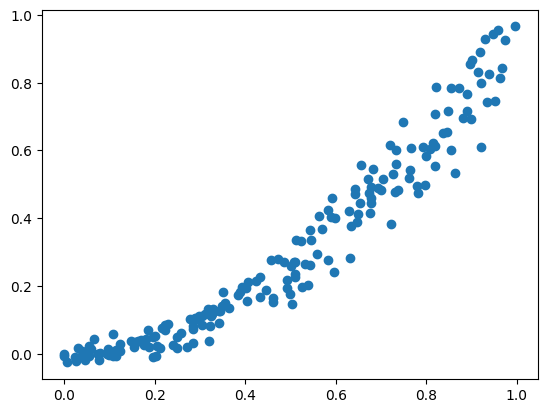

In [201]:
plt.scatter(X_lower[:,0], y_lower)

In [232]:
def basis(X):
    n, _ = X.shape
    ones = np.ones(shape=(n, 1))
    square = np.square(X)
    expm1 = np.expm1(X)
    log1p = np.log1p(X)
    sin = np.sin(X)
    return np.concatenate([square], axis=1)

In [233]:
Phi_lower = basis(X_lower)

In [234]:
w = linear(Phi_lower, y_lower, alpha=1.0e-6)

In [235]:
p_lower = Phi_lower @ w

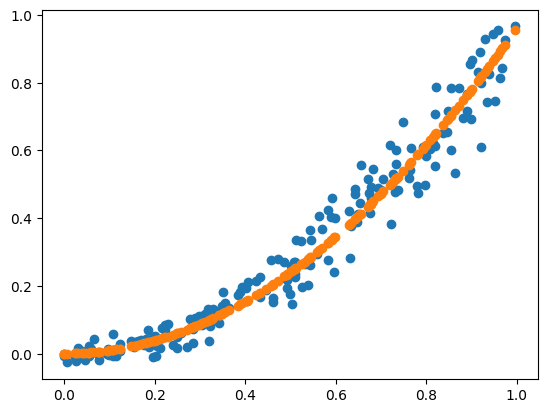

In [236]:
plt.scatter(X_lower[:, 0], y_lower)
plt.scatter(X_lower[:, 0], p_lower)

In [237]:
n_features = Phi_lower.shape[1]
alphas = [1.0e-3, 1.0e-2, 1.0e-1, 1.0, 1.0e+1, 1.0e+2, 1.0e+3]
W_trajectory = np.ndarray(shape=(len(alphas), n_features))

for i, alpha in enumerate(alphas):
    w = linear(Phi_lower, y_lower, alpha=alpha)
    W_trajectory[i] = w

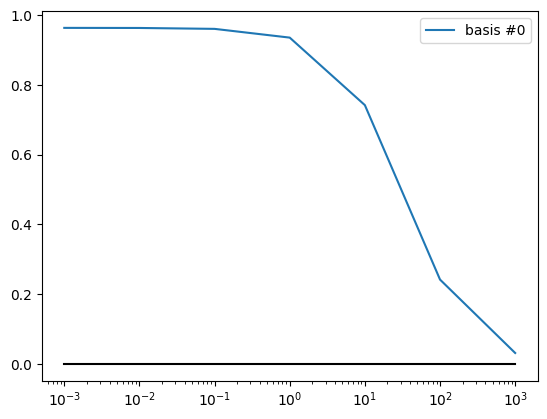

In [238]:
for i in range(n_features):
    plt.plot(alphas, W_trajectory[:, i], label=f'basis #{i}')
plt.plot(alphas, np.zeros_like(alphas), color='black')
plt.legend()
plt.xscale('log')

In [239]:
w = linear(Phi_lower, y_lower, alpha=1.0e-6)
pred = Phi_lower @ w
error_full = np.mean(np.square(pred - y_lower)) 
print(error_full)

0.0031097616418763407


In [240]:
Phi_lower.shape

(186, 1)

In [241]:
i = 2

print(Phi_lower[:, :i].shape)
print(Phi_lower[:, (i + 1):].shape)

(186, 1)
(186, 0)


In [242]:
errors = np.zeros(shape=(n_features, ))

for i in range(n_features):
    Phi_reduced = np.concatenate([
        Phi_lower[:, :i],
        Phi_lower[:, (i + 1):]
    ], axis=1)

    w = linear(Phi_reduced, y_lower, alpha=1.0e-6)
    pred = Phi_reduced @ w
    error = np.mean(np.square(pred - y_lower))
    errors[i] = error

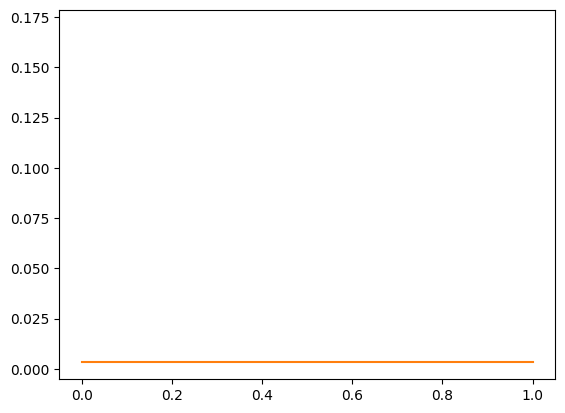

In [243]:
plt.plot(np.arange(n_features), errors)
plt.plot([0, n_features], [error_full, error_full])